# **Tracy Wang - EDA**

## **Research Question & Interests**  

This study aims to explore the relationship between **economic perceptions and voting behavior**, focusing on how voters' views on **unemployment, income inequality, and economic policies** influence their political alignment. In recent years, economic issues have played an increasingly significant role in U.S. politics, particularly in response to **major events such as the 2008 financial crisis, the rise of economic nationalism in 2016, and the COVID-19 recession in 2020**. These events have led to noticeable shifts in economic attitudes and party identification among different voter groups. By analyzing survey data from multiple election cycles (2000-2020), we seek to answer the following questions:  

- How do voters' perceptions of past and future unemployment correlate with party preference?
- Does concern over income inequality influence voter alignment with Democrats or Republicans? 
- How have voters' attitudes toward business, labor unions, welfare, and poverty evolved over time across different parties? 
- Do major economic events (e.g., the 2008 financial crisis, the 2020 COVID-19 recession) lead to significant changes in economic attitudes and voting patterns?

This study is not only interested in understanding **how economic perceptions shape voters' political choices** but also in exploring **whether structural shifts are occurring**—for example, whether the support bases of Republicans and Democrats have undergone realignment due to economic factors. Additionally, we aim to identify **how economic narratives influence election outcomes** and which specific economic issues (e.g., unemployment, income inequality, tax policies) have the most impact on voter decision-making. Through this research, we hope to provide deeper insights into how American voters respond to economic challenges in their political behavior. 

In [1]:
import os
import altair as alt
import pandas as pd
from IPython.display import Image

In [2]:
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

## 1. Load `raw_financial_data.csv`

In [3]:
data = pd.read_csv("../../data/raw/raw_financial_data.csv")

/var/folders/sw/1mrjqpl17vv01_kznj_kzwpr0000gn/T/ipykernel_47299/3088637549.py:1: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../../data/raw/raw_financial_data.csv")


In [4]:
data.head()

,VCF0004,VCF0705,VCF0114,VCF9227,VCF9228,VCF9225,VCF9226,VCF9229,VCF0209,VCF0210,VCF0219,VCF0220,VCF0223,VCF0901a,VCF0901b
0,1948.0,1. Democrat,3. 34 to 67 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
1,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
2,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
3,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99


In [5]:
data.describe()

,VCF0004
count,68224.000000
mean,1989.635143
std,21.433123
min,1948.000000
25%,1972.000000
50%,1990.000000
75%,2012.000000
max,2020.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68224 entries, 0 to 68223
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VCF0004   68224 non-null  float64
 1   VCF0705   47500 non-null  object 
 2   VCF0114   66713 non-null  object 
 3   VCF9227   21998 non-null  object 
 4   VCF9228   21998 non-null  object 
 5   VCF9225   28699 non-null  object 
 6   VCF9226   28699 non-null  object 
 7   VCF9229   24483 non-null  object 
 8   VCF0209   48168 non-null  object 
 9   VCF0210   53605 non-null  object 
 10  VCF0219   19847 non-null  object 
 11  VCF0220   31075 non-null  object 
 12  VCF0223   40906 non-null  object 
 13  VCF0901a  66423 non-null  object 
 14  VCF0901b  68224 non-null  object 
dtypes: float64(1), object(14)
memory usage: 7.8+ MB


In [7]:
data.columns

Index(['VCF0004', 'VCF0705', 'VCF0114', 'VCF9227', 'VCF9228', 'VCF9225',
       'VCF9226', 'VCF9229', 'VCF0209', 'VCF0210', 'VCF0219', 'VCF0220',
       'VCF0223', 'VCF0901a', 'VCF0901b'],
      dtype='object')

### Reorder Columns

In [8]:
desired_order = [
    "VCF0004", "VCF0705", "VCF0114", "VCF9227", "VCF9228", 
    "VCF9225", "VCF9226", "VCF9229", "VCF0209", "VCF0210", "VCF0219", 
    "VCF0220", "VCF0223", 'VCF0901a', 'VCF0901b'
]
# "VCF0822",

In [9]:
data = data[desired_order]
data.head()

,VCF0004,VCF0705,VCF0114,VCF9227,VCF9228,VCF9225,VCF9226,VCF9229,VCF0209,VCF0210,VCF0219,VCF0220,VCF0223,VCF0901a,VCF0901b
0,1948.0,1. Democrat,3. 34 to 67 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
1,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
2,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
3,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99


### Change Names of Columns into Readable Names

In [10]:
# Update the variable mapping dictionary
variable_mapping = {
    "VCF0004": "Year_of_Study",
    "VCF0705": "Voting_Preference",
    "VCF0114": "Income_Group",
    "VCF9227": "Income_Inequality",
    "VCF9228": "Income_Inequality_Change_Level",
    # "VCF0822": "Gov_Econ_Policy_Rating",
    "VCF9225": "Unemployment_Past_Year",
    "VCF9226": "Unemployment_Past_Year_Change_Level", 
    "VCF9229": "Unemployment_Next_Year",
    "VCF0209": "Thermometer_Business",
    "VCF0210": "Thermometer_Labor_Union",
    "VCF0219": "Thermometer_Middle_Class",
    "VCF0220": "Thermometer_Welfare",
    "VCF0223": "Thermometer_Poor",
    "VCF0901a": "State_Code_FIPS",
    "VCF0901b": "State_Code"
    }

# Rename the columns in the dataset
data.rename(columns=variable_mapping, inplace=True)

# Display the updated column names
data.columns

Index(['Year_of_Study', 'Voting_Preference', 'Income_Group',
       'Income_Inequality', 'Income_Inequality_Change_Level',
       'Unemployment_Past_Year', 'Unemployment_Past_Year_Change_Level',
       'Unemployment_Next_Year', 'Thermometer_Business',
       'Thermometer_Labor_Union', 'Thermometer_Middle_Class',
       'Thermometer_Welfare', 'Thermometer_Poor', 'State_Code_FIPS',
       'State_Code'],
      dtype='object')

In [11]:
data.head()

,Year_of_Study,Voting_Preference,Income_Group,Income_Inequality,Income_Inequality_Change_Level,Unemployment_Past_Year,Unemployment_Past_Year_Change_Level,Unemployment_Next_Year,Thermometer_Business,Thermometer_Labor_Union,Thermometer_Middle_Class,Thermometer_Welfare,Thermometer_Poor,State_Code_FIPS,State_Code
0,1948.0,1. Democrat,3. 34 to 67 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
1,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
2,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
3,1948.0,2. Republican,5. 96 to 100 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,1948.0,1. Democrat,4. 68 to 95 percentile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99


## 2. Processing Data Type and Change Each Field Name into Readable Names

### 2.1 Quantitative Variables

#### `Year_of_Study`

In [12]:
data["Year_of_Study"] = data["Year_of_Study"].astype(int)

In [13]:
data = data.query("Year_of_Study >= 2000 & Year_of_Study <= 2020")

#### `Thermometers`

In [14]:
thermometer_cols = [
    "Thermometer_Business",
    "Thermometer_Labor_Union",
    "Thermometer_Middle_Class",
    "Thermometer_Welfare",
    "Thermometer_Poor"
    
]

for col in thermometer_cols:
    data[col] = data[col].str.extract(r'(\d+\.?\d*)')
    data[col] = pd.to_numeric(data[col], errors='coerce')


#### `State_Code_FIPS`

In [15]:
data['State_Code_FIPS'] = pd.to_numeric(data['State_Code_FIPS'], errors='coerce')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25316 entries, 42908 to 68223
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year_of_Study                        25316 non-null  int64  
 1   Voting_Preference                    23805 non-null  object 
 2   Income_Group                         23805 non-null  object 
 3   Income_Inequality                    21998 non-null  object 
 4   Income_Inequality_Change_Level       21998 non-null  object 
 5   Unemployment_Past_Year               21998 non-null  object 
 6   Unemployment_Past_Year_Change_Level  21998 non-null  object 
 7   Unemployment_Next_Year               21998 non-null  object 
 8   Thermometer_Business                 25316 non-null  float64
 9   Thermometer_Labor_Union              25316 non-null  float64
 10  Thermometer_Middle_Class             9448 non-null   float64
 11  Thermometer_Welfare          

### 2.2 Categorical and Ordinal Variables

#### `Income_Inequality` (Categorical)

In [17]:
Income_Inequality_mapping = {
    "1. Larger": "Larger",  
    "2. About the same": "Same", 
    "3. Smaller": "Smaller",     
    "-9. RF; NA; Inap, no post data": None,
    "-8. DK": None,
    None: None
}

data["Income_Inequality"] = data["Income_Inequality"].replace(Income_Inequality_mapping)
data["Income_Inequality"].value_counts(dropna=False)

Income_Inequality
Larger     16640
None        3936
Same        3624
Smaller     1116
Name: count, dtype: int64

#### `Income_Inequality_Change_Level` (Ordinal)

In [18]:
Income_Inequality_Change_Level_mapping = {
    "5. Much smaller": 5,
    "4. Somewhat smaller": 4,
    "3. About the same": 3,
    "2. Somewhat larger": 2,
    "1. Much larger": 1,
    "-9. RF; NA; Inap, DK/RF/NA whether larger or smaller; no post data": None,
    "-8. DK": None,
    None: None
}

data["Income_Inequality_Change_Level"] = data["Income_Inequality_Change_Level"].replace(Income_Inequality_Change_Level_mapping)
data["Income_Inequality_Change_Level"].value_counts(dropna=False)

/var/folders/sw/1mrjqpl17vv01_kznj_kzwpr0000gn/T/ipykernel_47299/1213497110.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Income_Inequality_Change_Level"] = data["Income_Inequality_Change_Level"].replace(Income_Inequality_Change_Level_mapping)


Income_Inequality_Change_Level
1.0    12206
2.0     4408
NaN     3966
3.0     3624
4.0      788
5.0      324
Name: count, dtype: int64

#### `Unemployment_Past_Year` (Categorical)

In [19]:
unemployment_mapping = {
    "1. Better": "Better",  
    "2. Stayed same": "Same", 
    "3. Worse": "Worse",     
    "-9. RF; NA; Inap, half sample administration (1986); programming error (2004)": None,
    "-8. DK": None,
    None: None 
}

data["Unemployment_Past_Year"] = data["Unemployment_Past_Year"].replace(unemployment_mapping)
data["Unemployment_Past_Year"].value_counts(dropna=False)

Unemployment_Past_Year
Worse     11390
Same       5524
Better     4800
None       3602
Name: count, dtype: int64

#### `Unemployment_Past_Year_Change_Level` ((Ordinal))

In [20]:
unemployment_mapping = {
    "1. Much better": 1,
    "2. Somewhat better": 2, 
    "3. Same": 3, 
    "4. Somewhat worse": 4,   
    "5. Much worse": 5,  
    "-9. RF; NA; Inap, DK/RF/NA whether better or worse; half sample administration (": None,
    "-8. DK": None,
    None: None
}

data["Unemployment_Past_Year_Change_Level"] = data["Unemployment_Past_Year_Change_Level"].replace(unemployment_mapping)
data["Unemployment_Past_Year_Change_Level"].value_counts(dropna=False)

/var/folders/sw/1mrjqpl17vv01_kznj_kzwpr0000gn/T/ipykernel_47299/2283193587.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Unemployment_Past_Year_Change_Level"] = data["Unemployment_Past_Year_Change_Level"].replace(unemployment_mapping)


Unemployment_Past_Year_Change_Level
5.0    7635
3.0    5524
4.0    3743
2.0    3620
NaN    3617
1.0    1177
Name: count, dtype: int64

#### Voting_Preference (Categorical)
- I only focus on `Democrat` and `Republican`

In [21]:
mapping = {
    "1. Democrat": "Democrat",
    "2. Republican": "Republican",
    "0. Did not vote; DK/NA if voted; refused to say if": None,
    "3. Other (incl. 3d/minor party candidates and write-ins)": None,
    None: None
}

data["Voting_Preference"] = data["Voting_Preference"].replace(mapping)
data["Voting_Preference"].value_counts(dropna=False)

Voting_Preference
Democrat      9411
None          8930
Republican    6975
Name: count, dtype: int64

#### Income_Group (Ordinal)

In [22]:
# Define the income group mapping
income_group_mapping = {
    "1. 0 to 16 percentile": "Low Income",
    "2. 17 to 33 percentile": "Low Income",
    "3. 34 to 67 percentile": "Middle Income",
    "4. 68 to 95 percentile": "Upper Middle Income",
    "5. 96 to 100 percentile": "High Income",
    "0. DK; NA; refused to answer; no Pre IW": None,  
    None: None
}

data["Income_Group"] = data["Income_Group"].replace(income_group_mapping)
data["Income_Group"].value_counts(dropna=False)

Income_Group
Low Income             8051
Middle Income          7484
Upper Middle Income    5884
None                   2740
High Income            1157
Name: count, dtype: int64

#### `Unemployment_Next_Year` (Categorical)

In [23]:
unemployment_mapping = {
    "1. More unemployment": "Worse",  
    "2. About the same": "Same", 
    "3. Less unemployment": "Better",     
    "-9. RF; NA; Inap, no post data; programming error (2004)": None,  
    "-8. DK": None,
    None: None 
}

data["Unemployment_Next_Year"] = data["Unemployment_Next_Year"].replace(unemployment_mapping)
data["Unemployment_Next_Year"].value_counts(dropna=False)

Unemployment_Next_Year
Same      10104
Better     5921
Worse      5527
None       3764
Name: count, dtype: int64

#### `State_Code`

In [24]:
data = data.dropna(subset=['Income_Group'])
data["Year_of_Study"].unique().tolist()

[2000, 2004, 2008, 2012, 2016, 2020]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22576 entries, 42908 to 68223
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year_of_Study                        22576 non-null  int64  
 1   Voting_Preference                    15734 non-null  object 
 2   Income_Group                         22576 non-null  object 
 3   Income_Inequality                    20539 non-null  object 
 4   Income_Inequality_Change_Level       20516 non-null  float64
 5   Unemployment_Past_Year               20828 non-null  object 
 6   Unemployment_Past_Year_Change_Level  20816 non-null  float64
 7   Unemployment_Next_Year               20698 non-null  object 
 8   Thermometer_Business                 22576 non-null  float64
 9   Thermometer_Labor_Union              22576 non-null  float64
 10  Thermometer_Middle_Class             8924 non-null   float64
 11  Thermometer_Welfare          

In [26]:
# data_cleaned = data.dropna()
# data_cleaned["Year_of_Study"].unique().tolist()

## 3. Export the cleaned dataset as a CSV file

In [27]:
data.to_csv("../../data/processed/cleaned_financial_data.csv", index=False)

In [28]:
# data_cleaned.to_csv("../../data/processed/cleaned_financial_data.csv2", index=False)

## **4. Data Visualization**

### *4.0 Define a Configure Function*

In [29]:
def apply_default_config(chart):
    return chart.configure_view(
        strokeWidth=0
    ).configure_title(
        fontSize=20
    ).configure_axis(
        labelFontSize=14,
        titleFontSize=16
    ).configure_header(
        labelFontSize=15,
        titleFontSize=17
    ).configure_legend(
        labelFontSize=14,
        titleFontSize=16
    )

### **4.1 Univariate Analysis**

### <u>*4.1.1 Distribution of Vote Choice from 2000 to 2020*<u>

In [30]:
vote_aggregated_data = data.groupby(['Year_of_Study', 'Voting_Preference']).size().reset_index(name='count')
# vote_aggregated_data.head()

In [31]:
# Create bar chart for Vote Choice
chart1_vp = alt.Chart(vote_aggregated_data).mark_bar(opacity=0.5).encode(
    alt.X('Voting_Preference:N', axis=None),
    alt.Y('count', title="Number of Respondents"),
    alt.Color('Voting_Preference:N', 
                  title='Voting Preference',
                  scale=alt.Scale(domain=["Democrat", "Republican"], range=["blue", "red"])), 
    alt.Column('Year_of_Study',title="Election Year", header=alt.Header(labelOrient="bottom", titleOrient="bottom"))
).transform_filter(
     (alt.datum.Voting_Preference == 'Democrat') | (alt.datum.Voting_Preference == 'Republican')  
).properties(
    width=100,
    height=200,
    title="Chart 1: Distribution of Vote Preference from 2000 to 2020"
)

chart1_vp = apply_default_config(chart1_vp)
# chart1_vp

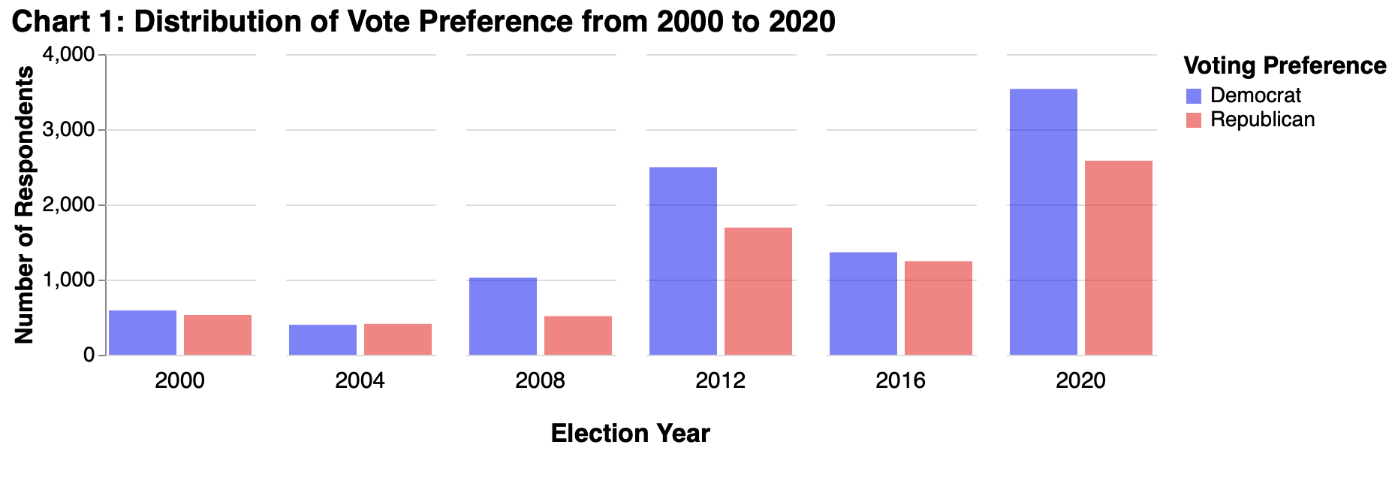

In [32]:
Image(filename='TracyEDA_images/TracyEDA-Chart1.png')

#### <u>**Observation**<u>

**Democrats (Blue) Dominated Certain Years**
- In 2012 and 2020, the number of Democratic voters significantly exceeded Republican voters.
- This may reflect high support for Democrats in those years, such as Obama’s re-election in 2012 and Biden’s victory in 2020.

**Republicans (Orange) Had Competitive Years**
- In 2004 and 2016, the number of Republican voters was close to that of Democrats.
- This aligns with Bush’s re-election (2004) and Trump’s victory (2016), showing shifts in voter preference.

**Overall Trend**
- Between 2000 and 2020, Democratic voter numbers showed an increasing trend, especially in 2012 and 2020.
- Republican voter numbers remained relatively stable, with a strong performance in 2016.
- Total voter count peaked in 2012 and 2020, likely due to increased voter turnout.

### <u>*4.1.2. Income Group Distribution*<u>

In [33]:
income_aggregated_data = data.groupby(['Year_of_Study', 'Income_Group']).size().reset_index(name='count')
# income_aggregated_data.head()

In [34]:
order=['Low Income', 'Middle Income', 'Upper Middle Income', 'High Income']

In [35]:
chart2_income = alt.Chart(income_aggregated_data).mark_bar().encode(
    alt.X("Income_Group:N", axis=None, sort=order),
    alt.Y("count", title="Number of Respondents"),
    alt.Color("Income_Group:N", 
              title="Income Group",
              scale=alt.Scale(domain=order) 
             ),
        alt.Column('Year_of_Study',title="Election Year", header=alt.Header(labelOrient="bottom", titleOrient="bottom")),
).properties(
    width=100,
    height=200,
    title="Chart 2: Distribution of Income Group from 2000 to 2020"
).transform_filter(
     (alt.datum.Income_Group == 'High Income') 
    | (alt.datum.Income_Group == 'Upper Middle Income') 
    | (alt.datum.Income_Group == 'Middle Income') 
    | (alt.datum.Income_Group == 'Low Income')
)

chart2_income = apply_default_config(chart2_income)
# chart2_income

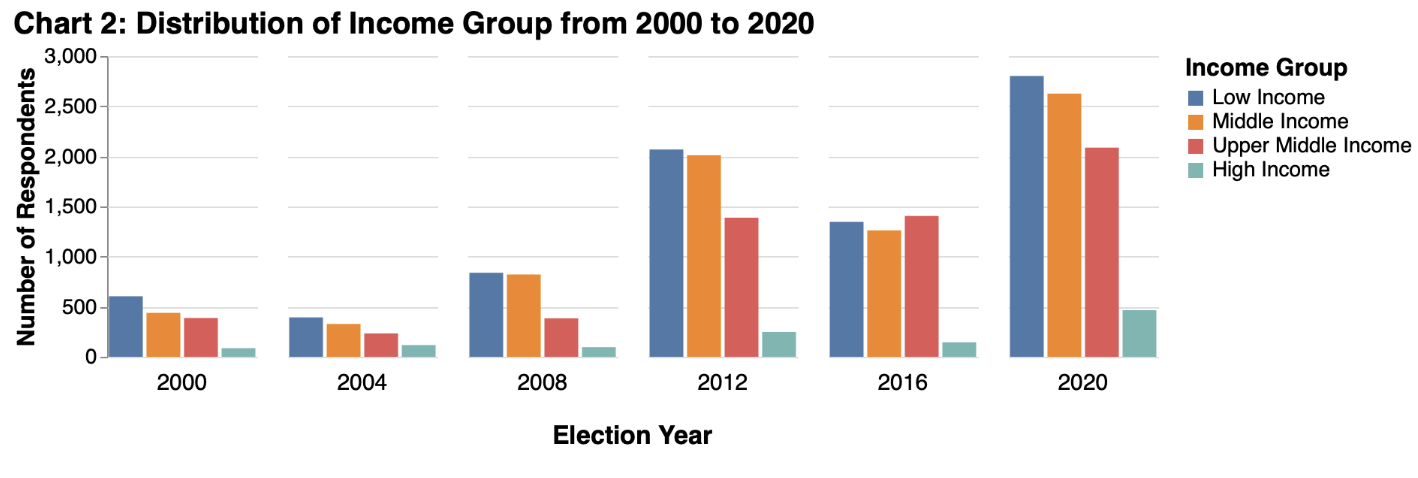

In [36]:
Image(filename='TracyEDA_images/TracyEDA-Chart2.png')

#### <u>**Observation**<u>

**Overall Increase in Respondents Over Time**
- The total number of respondents in all income groups increased significantly in 2020 compared to earlier years.
- This could be due to population growth, higher survey participation, or economic changes over time.

**Low and Middle-Income Groups Dominate**
- Low-income (orange) and middle-income (green) groups have the highest counts across all years.
- High-income group (blue) consistently has the lowest number of respondents in all years.
- This suggests that the majority of the surveyed population falls within the lower and middle-income brackets.

**Anomaly in 2016: Upper Middle Income Surge**
- 2016 is an outlier where Upper Middle Income respondents outnumbered other income groups, breaking the usual pattern.
- This could be due to strong economic growth, shifts in income classification, and higher survey participation from professionals.

**Significant Growth in 2020**
- The number of low-income and middle-income respondents increased sharply in 2020.
- This could be due to economic challenges, such as the COVID-19 pandemic, which may have shifted more people into lower-income brackets.

### **4.2 Multivariate Analysis**

### <u>*4.2.1 Income Group vs. Vote Preference*<u>

In [37]:
income_vote_aggregated_data = data.groupby(['Year_of_Study', 'Income_Group', 'Voting_Preference']).size().reset_index(name='count')

total_counts = income_vote_aggregated_data.groupby(["Year_of_Study",'Voting_Preference'])["count"].transform("sum")
income_vote_aggregated_data["percentage"] = (income_vote_aggregated_data["count"] / total_counts) * 100
# income_vote_aggregated_data.head()

In [38]:
chart_D = alt.Chart(income_vote_aggregated_data).mark_rect().encode(
    alt.X("Income_Group:N", 
          title=None,axis=alt.Axis(labels=False, ticks=False), 
          sort=order),
    alt.Y("Voting_Preference:N", title=None),
    alt.Color("percentage:Q", title="Vote Percentage", scale=alt.Scale(scheme='blues')), 
    alt.Column('Year_of_Study',title="Election Year")
).properties(
    width=160,
    height=40
).transform_filter(
    (alt.datum.Voting_Preference == "Democrat")
)
# chart_D

In [39]:
chart_R = alt.Chart(income_vote_aggregated_data).mark_rect().encode(
    alt.X("Income_Group:N", 
          title=None, 
          sort=order, 
          axis=alt.Axis(
              labelExpr="datum.value == 'Low Income' ? 'Low' : " +
                      "datum.value == 'Middle Income' ? 'Middle' : " +
                      "datum.value == 'Upper Middle Income' ? 'Upper Middle' : " +
                      "datum.value == 'High Income' ? 'High':'NA'",
              labelAngle=-30)),
    alt.Y("Voting_Preference:N", title=None),
    alt.Color("percentage:Q", title=None, scale=alt.Scale(scheme='reds')), 
    alt.Column('Year_of_Study',title=None, header=None)
).properties(
    width=160,
    height=40
).transform_filter(
    (alt.datum.Voting_Preference == "Republican")
)
# chart_R

In [40]:
chart3 = alt.vconcat(chart_D, chart_R).resolve_scale(
    color='independent'  
).properties(
    title="Chart 3: Income Group vs. Vote Preference (Democrat & Republican, 2000–2020)"
)

In [41]:
y_label = alt.Chart(pd.DataFrame({'text': ['Vote Preference']})).mark_text(
    angle=270,
    align='center',
    baseline='middle',
    fontSize=17,
    fontWeight='bold',
    dx=-60  
).encode(
    text='text:N'
)

x_label = alt.Chart(pd.DataFrame({'text': ['Income Groups']})).mark_text(
    align='center',
    baseline='bottom',
    fontSize=17,
    fontWeight='bold',
    dy=30  
).encode(
    text='text:N'
).properties(
    width=1050,  
    height=5
)

combined_chart= y_label | (chart3 
           &
           x_label)

In [42]:
final_chart3 = apply_default_config(combined_chart) 
# final_chart3

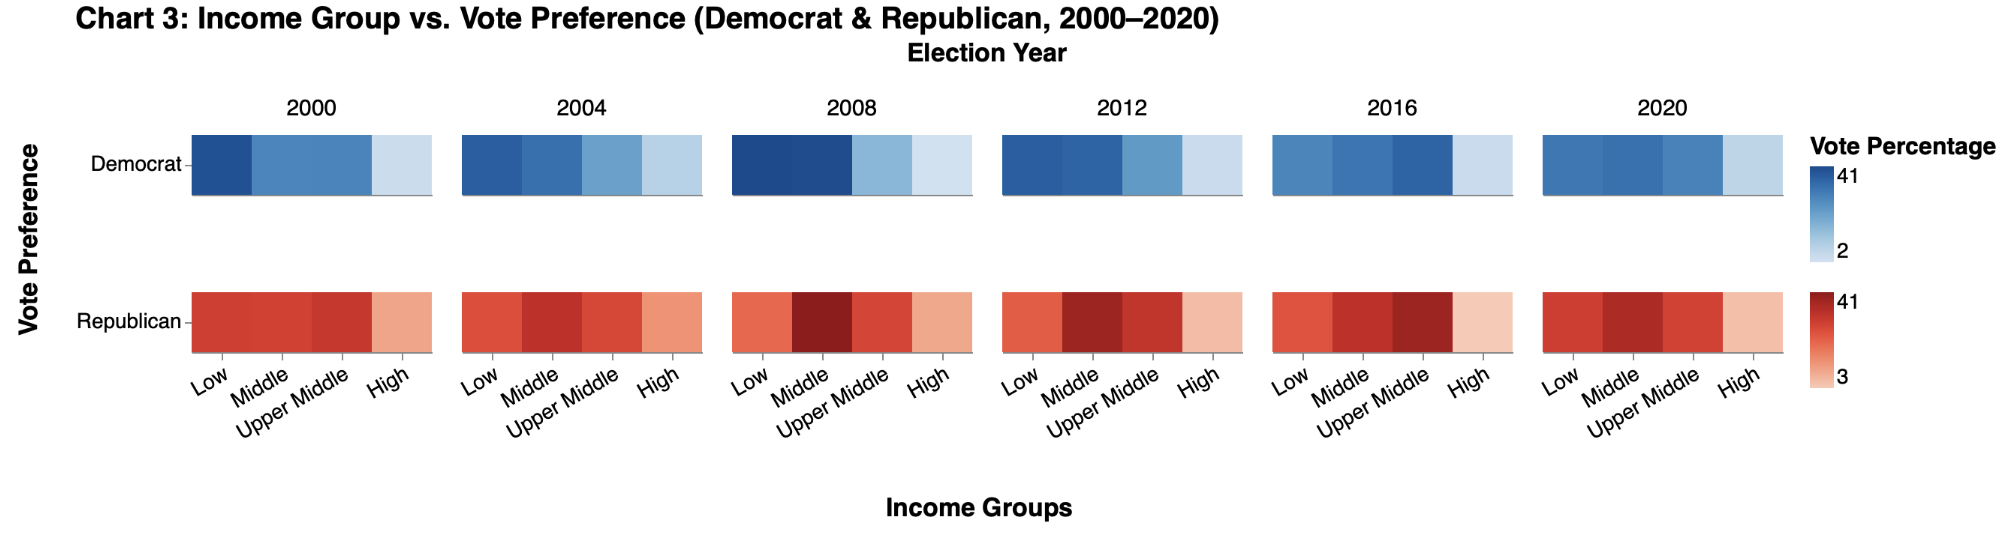

In [43]:
Image(filename='TracyEDA_images/TracyEDA-Chart3.png')

#### <u>**Observation**

**Democratic Support Among Lower-Income Groups**
- In most years, low-income and middle-income groups tend to vote more Democratic (darker blue in the top rows).
- This aligns with the idea that Democrats generally attract lower-income voters through policies on social safety nets, healthcare, and labor rights.

**Republican Support Among Higher-Income Groups**
- High-income voters show higher support for Republicans in most election years (lighter top row, darker bottom row).
- This suggests that higher-income individuals may be drawn to Republican policies favoring tax cuts, deregulation, and business incentives.

**Shift in Republican Support in 2016**
- In 2016, Republican support is more evenly distributed across all income groups, compared to previous years.
- This suggests that Trump’s messaging on economic nationalism, tax cuts, and deregulation may have appealed to middle-income and working-class voters who traditionally leaned Democratic.

**2012 and 2020: Strong Democratic Gains**
- 2012: Higher Democratic support across all income levels, likely due to Obama’s policies post-financial crisis (e.g., economic stimulus, healthcare expansion).
- 2020: Despite Trump’s pro-business policies, Democrats regained ground among middle- and low-income voters, likely due to COVID-19 economic disruptions and healthcare concerns.

### <u>*4.2.2 Perception of Income Inequality vs. Vote Choice*<u>

In [44]:
inequality_aggregated_data = data.groupby(['Year_of_Study', 'Income_Inequality_Change_Level', 'Voting_Preference']).size().reset_index(name='count')
# inequality_aggregated_data.head()

total_counts = inequality_aggregated_data.groupby(["Year_of_Study",'Voting_Preference'])["count"].transform("sum")
inequality_aggregated_data["percentage"] = (inequality_aggregated_data["count"] / total_counts) * 100

inequality_aggregated_data.head()

,Year_of_Study,Income_Inequality_Change_Level,Voting_Preference,count,percentage
0,2004,1.0,Democrat,222,61.495845
1,2004,1.0,Republican,133,37.254902
2,2004,2.0,Democrat,101,27.977839
3,2004,2.0,Republican,137,38.375350
4,2004,3.0,Democrat,28,7.756233


In [45]:
chart4 = alt.Chart(inequality_aggregated_data).mark_bar(opacity=0.5).encode(
    alt.X("Income_Inequality_Change_Level:O", 
          title=None,
         axis=alt.Axis(
            labelExpr="datum.value == '5' ? 'Much smaller' : " +
                      "datum.value == '4' ? 'Somewhat smaller' : " +
                      "datum.value == '3' ? 'About the same' : " +
                      "datum.value == '2' ? 'Somewhat larger' :"+ 
             "datum.value == '1' ? 'Much larger':'NA'",
          labelAngle=-30)),
    alt.Y("count:Q", title="Number of Vote"),
    alt.Color('Voting_Preference:N', 
                  title='Voting Preference',
                  scale=alt.Scale(domain=["Democrat", "Republican"], range=["blue", "red"])), 
    alt.Column('Year_of_Study', title="Election Year",header=alt.Header(labelOrient="top", titleOrient="top")),
    # tooltip=["Income_Inequality_Change_Level", "Voting_Preference", "count",]
).properties(
    title="Chart 4: Vote Choice by Income Inequality Perception",
    width=150,
    height=300
)

In [46]:
x_label = alt.Chart(pd.DataFrame({'text': ['Perceived Change in U.S. Income Inequality (Past 20 Years)']})).mark_text(
    align='center',
    baseline='bottom',
    fontSize=17,
    fontWeight='bold',
    dy=30  
).encode(
    text='text:N'
).properties(
    width=800,  
    height=5
)
combin_chart= chart4 & x_label
chart4 = apply_default_config(combin_chart) 
# chart4

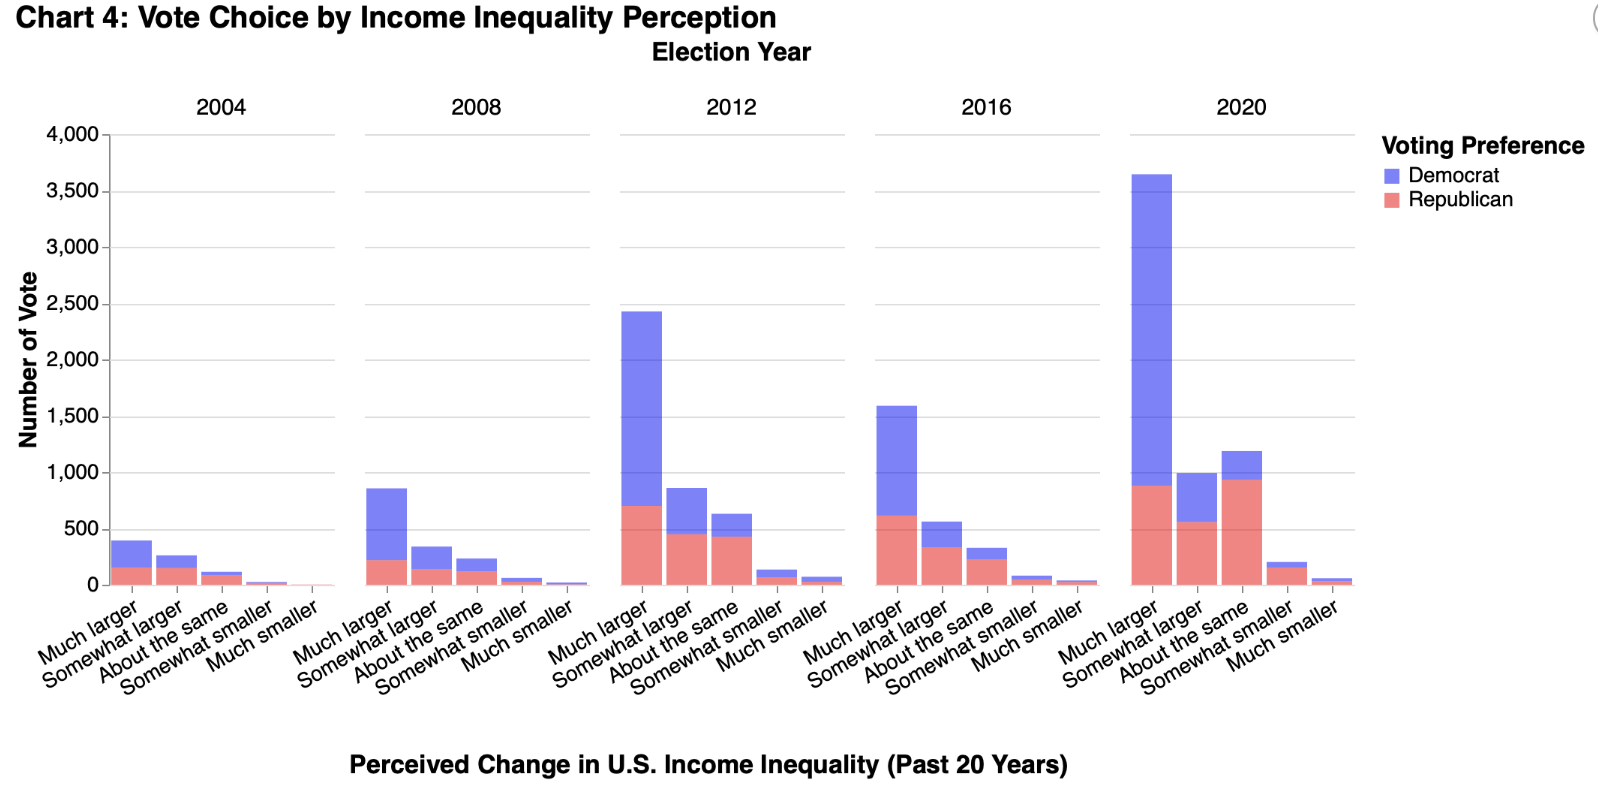

In [47]:
Image(filename='TracyEDA_images/TracyEDA-Chart4.png')

#### <u>**Observation**<u>
**Perceived Increase in Income Inequality Correlates with Higher Democratic Support**
- Voters who believe that income inequality has increased ("Much larger" and "Somewhat larger") overwhelmingly vote Democratic (dominant blue bars).
- This trend remains consistent from 2004 to 2020, indicating that concerns over inequality align with Democratic policies on wealth redistribution, taxation, and social programs.
 
**Republican Support is Higher Among Those Who See Less Income Inequality Growth**
- Voters who believe income inequality has remained the same ("About the same") or decreased ("Somewhat smaller", "Much smaller") are more likely to vote Republican.
- This suggests that Republican supporters may be less likely to see inequality as a pressing issue or may believe in market-based solutions rather than government intervention.

**Steady Increase in Concern About Income Inequality Over Time**
- In later years (2016, 2020), the number of respondents selecting "Much larger" increased, suggesting growing public concern about wealth disparities.
- The 2008 financial crisis and the 2020 COVID-19 pandemic could be key factors contributing to this perception.

**2020 Returns to Pre-2016 Trends, with Stronger Democratic Support Among Inequality-Conscious Voters**
- In 2020, Democratic support increased again among those who perceived rising inequality.
This could be linked to COVID-19’s economic impact, stimulus discussions, and rising cost-of-living concerns.


### <u>*4.2.3 Unemployment Perception vs. Voting Preferences*<u>

In [48]:
vote_aggregated = data.groupby(['Year_of_Study','Unemployment_Past_Year', 'Unemployment_Next_Year', 'Voting_Preference']).size().reset_index(name='count')
total_counts = vote_aggregated.groupby(['Year_of_Study','Unemployment_Past_Year','Unemployment_Next_Year'])["count"].transform("sum")
vote_aggregated["percentage"] = (vote_aggregated["count"] / total_counts) * 100
vote_aggregated.head()

,Year_of_Study,Unemployment_Past_Year,Unemployment_Next_Year,Voting_Preference,count,percentage
0,2004,Better,Better,Democrat,6,7.692308
1,2004,Better,Better,Republican,72,92.307692
2,2004,Better,Same,Democrat,16,17.777778
3,2004,Better,Same,Republican,74,82.222222
4,2004,Better,Worse,Democrat,3,75.000000


In [49]:
past_une_order = ["Better", "Same", "Worse"]
next_une_order = ["Better", "Same", "Worse"]

In [50]:
chart5 = alt.Chart(vote_aggregated).mark_circle(opacity=0.5).encode(
    alt.X('Unemployment_Past_Year:N', sort=past_une_order, title=None, axis=alt.Axis(labelAngle=-30)),
    alt.Y("Unemployment_Next_Year:N", sort=next_une_order, title=None),
    alt.Color('Voting_Preference:N', 
              title='Voting Preference',
              scale=alt.Scale(domain=["Democrat", "Republican"], range=["blue", "red"])), 
    alt.Size("percentage:Q", scale=alt.Scale(range=[10, 1500])), 
    alt.Column('Year_of_Study', title="Election Year"),
    # tooltip=["Unemployment_Past_Year", "Unemployment_Next_Year", "Voting_Preference", "percentage"]
).properties(
    width=200,
    height=200,
    title="Chart 5: Voting Preference vs. Past and Future Unemployment Perception (2000–2020)"
)

In [51]:
y_label = alt.Chart(pd.DataFrame({'text': ['Future Unemployment Perception']})).mark_text(
    angle=270,
    align='center',
    baseline='middle',
    fontSize=16,
    fontWeight='bold',
    dx=-60  
).encode(
    text='text:N'
).properties(
    width=0,  
    height=100
)

x_label = alt.Chart(pd.DataFrame({'text': ['Past Unemployment Perception']})).mark_text(
    align='center',
    baseline='bottom',
    fontSize=16,
    fontWeight='bold',
    dy=30  
).encode(
    text='text:N'
).properties(
    width=1200,  
    height=5
)

combined_chart= y_label | (chart5
           &
           x_label)

In [52]:
final_chart5 = apply_default_config(combined_chart) 
# final_chart5

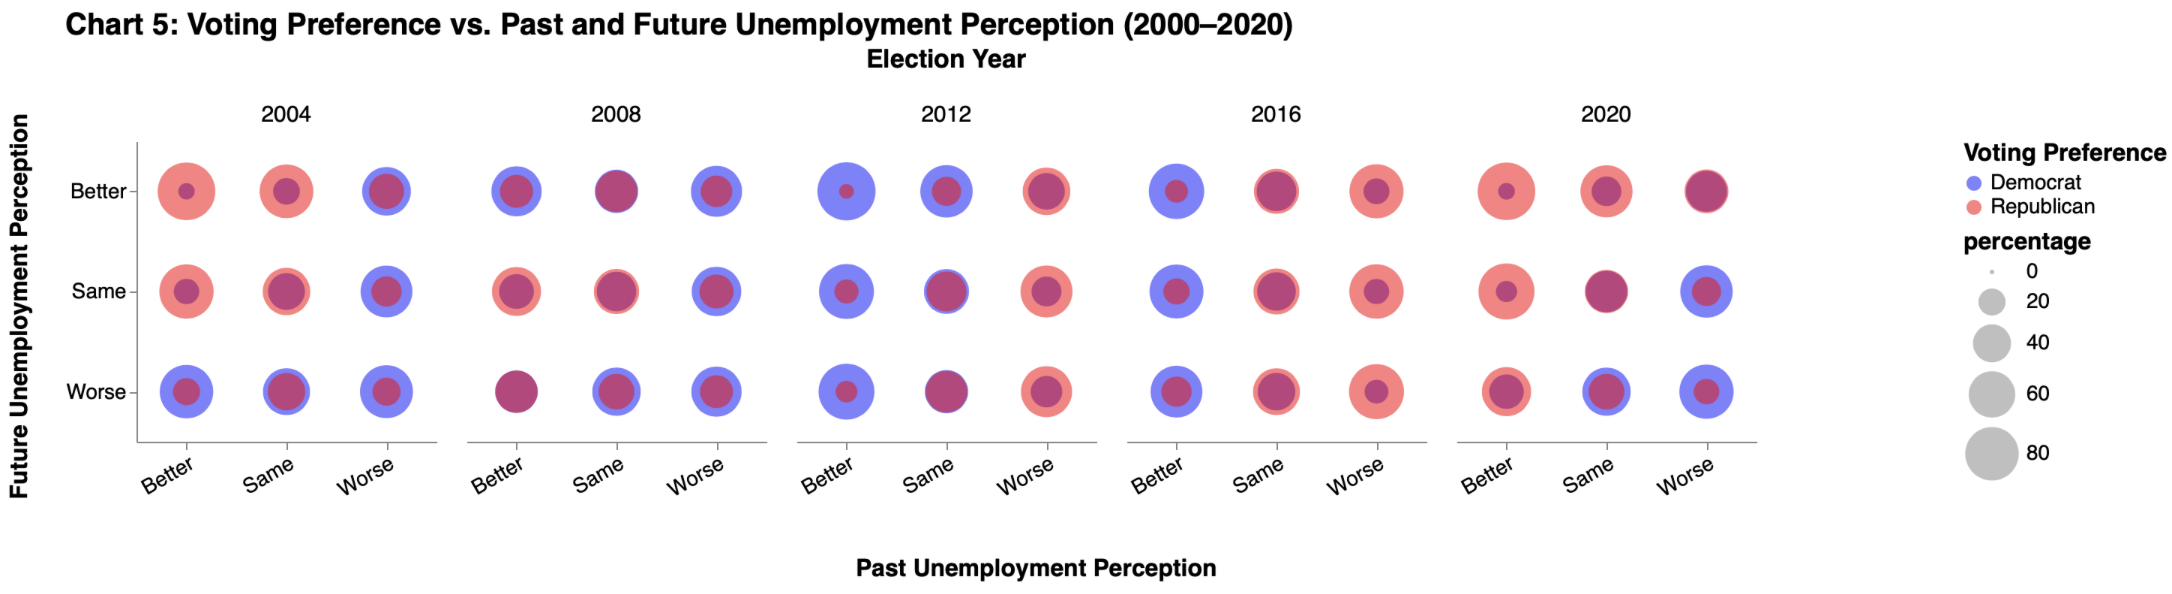

In [53]:
Image(filename='TracyEDA_images/TracyEDA-Chart5.png')

#### <u>**Observation**<u>

**2004**  
- Republican voters dominate across all categories (orange bubbles are larger).  
- Democratic voters (blue) are mainly in the "Worse" category, indicating concern about rising unemployment.  
- Republican voters appear more optimistic, believing unemployment was stable or improving.  
- Key Context: This was Bush’s re-election year, during which economic optimism was high among conservatives.  

**2008**  
- A shift begins as more Democratic voters express concerns about unemployment.  
- Republican voters still hold strong in "Better" and "Same" categories, but their dominance shrinks compared to 2004. 
- Key Context: The 2008 financial crisis started unfolding, making unemployment a bigger issue for Democratic voters.  


**2012**  
- A more balanced picture emerges:  
  - Republican voters still dominate optimistic categories, but their advantage is less pronounced.  
  - Democratic voters increase in "Same" and "Worse" perceptions, indicating concerns about recovery efforts.  
- Key Context: This was Obama’s re-election year, with a focus on economic recovery from the Great Recession.  


**2016**  
- Both parties are more evenly distributed across perceptions.  
- Democratic voters are still largely in "Worse", but Republicans also appear in those categories more than before.  
- Republican presence in "Same" and "Worse" perceptions suggests economic concerns helped Trump’s populist messaging.  
- Key Context: Trump’s campaign focused on economic dissatisfaction, trade deals, and job losses, which resonated across party lines.  


**2020**  
- A major shift occurs:  
  - Republican voters are more evenly distributed across all categories (even in "Worse"), indicating economic uncertainty among conservatives.  
  - Democratic voters increase significantly in "Worse" perceptions, showing heightened concerns about unemployment.  
- Key Context: The OVID-19 pandemic created economic instability, leading more voters to express pessimism across both parties.  

#### <u>**Overall Trends & Takeaways**<u>

**Republicans Are Generally More Optimistic About Unemployment**  
- From 2004-2016, Republican voters mostly believed unemployment was stable or improving.  
- Only in 2020 did Republican voters become more concerned about worsening unemployment.  

**Democrats Consistently Express More Concern About Unemployment**  
- Across all years, Democratic voters tend to believe unemployment is worsening.  
- Their numbers in the "Worse" category increase significantly in crisis years (2008, 2020).  

**2016 Was a Turning Point**  
- Before 2016, Republicans were mostly optimistic.  
- In 2016, Trump’s economic message resonated across economic anxiety groups, leading to more Republican representation in "Worse" perceptions.  

**2020 Saw a Bipartisan Shift Toward Economic Pessimism**  
- The pandemic caused more Republicans to shift into the "Worse" perception category than in previous years.  
- Economic concerns became a key issue for both parties, although, Democrats still had the highest unemployment concerns overall.  

### <u>*4.2.4 Shifts in Economic Attitudes and Party Alignment Over Election Cycles*<u>

In [54]:
# List of thermometer variables
thermometer_vars = [
    "Thermometer_Business",
    "Thermometer_Labor_Union",
    "Thermometer_Middle_Class",
    "Thermometer_Welfare",
    "Thermometer_Poor"
]

In [55]:
# Function to generate a density plot for a given variable
def create_density_chart(variable):
    return alt.Chart(data).transform_density(
        variable,
        groupby=['Voting_Preference'], 
        as_=[variable, 'density']
    ).mark_area(opacity=0.4).encode(
        alt.X(f'{variable}:Q',
              scale=alt.Scale(domain=[0, 100]), 
              title=f'Attitude Toward {variable.split("_")[-1]} (Thermometer Score)'),
        alt.Y('density:Q', title='Density', stack=None),
        alt.Color('Voting_Preference:N', 
                  title='Voting Preference',
                  scale=alt.Scale(domain=["Democrat", "Republican"], range=["blue", "red"]))  
    ).properties(
        height=200,
        width=400,
        title=f"Distribution of Attitudes Toward {variable.split('_')[-1]} by Party Affiliation"
    )


In [56]:
# Generate all charts and display them
charts = [create_density_chart(var) for var in thermometer_vars]
row1 = alt.hconcat(charts[0], charts[1])
row2 = alt.hconcat(charts[2], charts[3])
row3 = alt.hconcat(charts[4])
combined_chart = alt.vconcat(row1, row2, row3)
final_chart6 = apply_default_config(combined_chart) 
# final_chart6

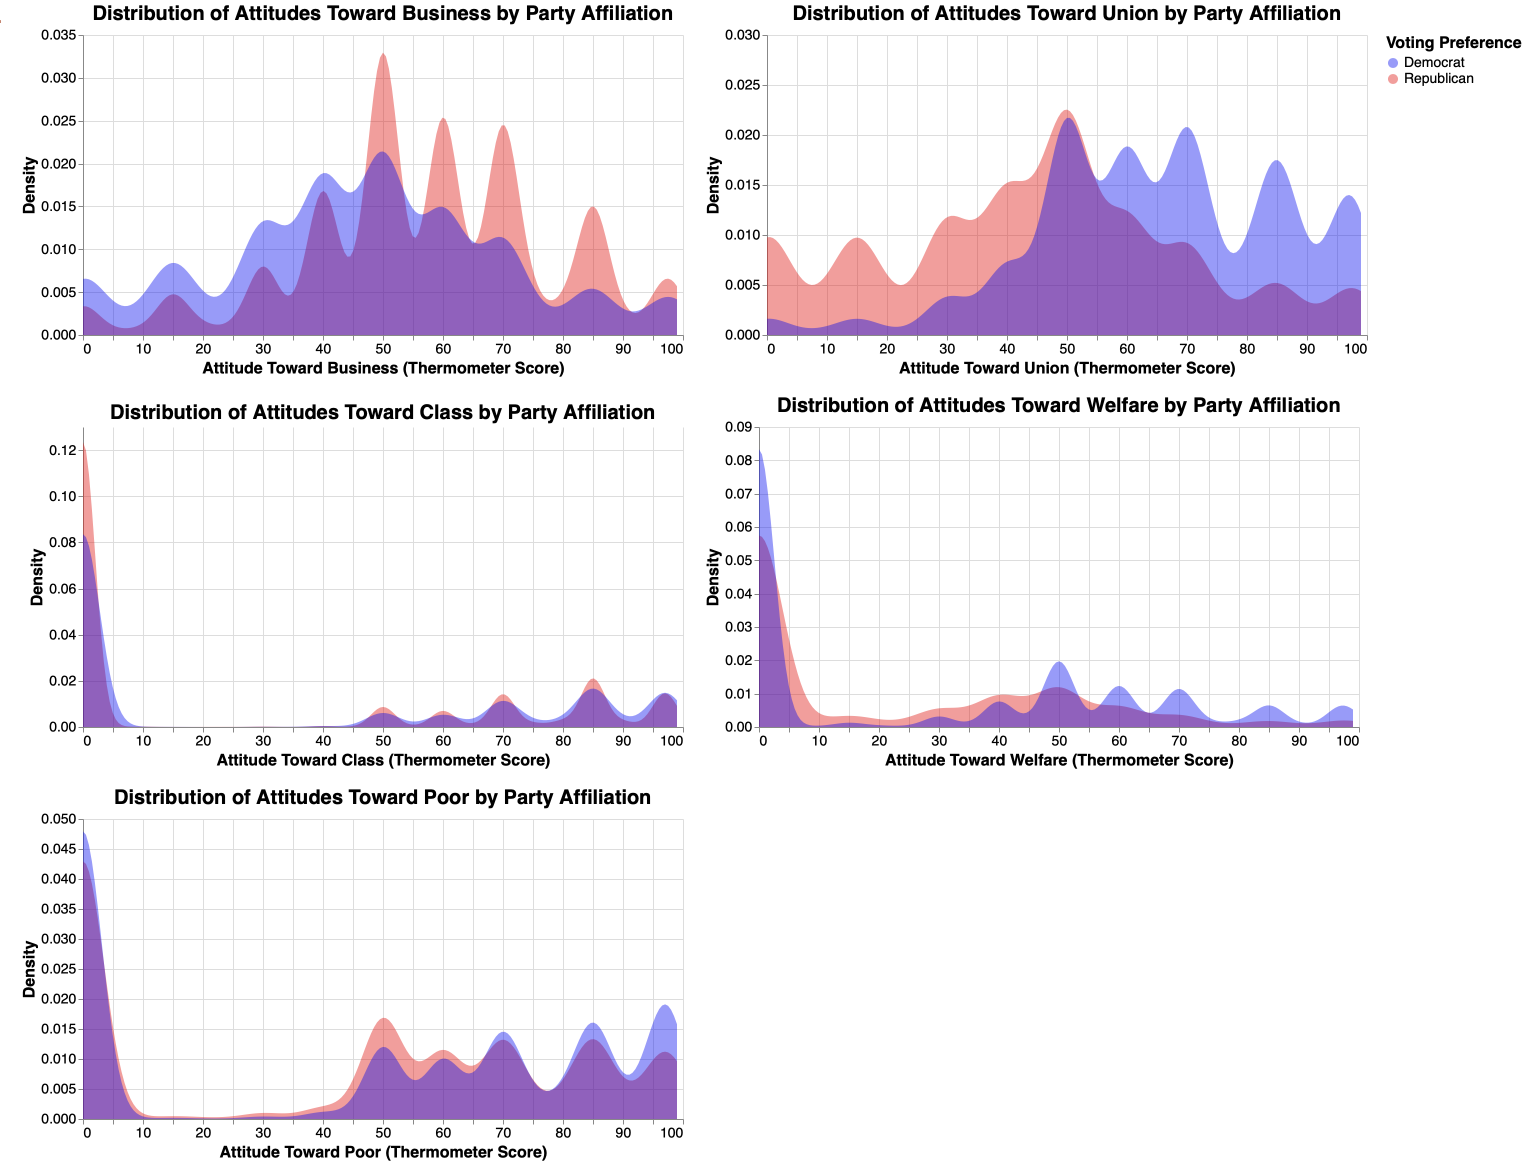

In [57]:
Image(filename='TracyEDA_images/TracyEDA-Chart6.png')

#### <u>**Key Findings by Category**<u>

**Attitudes Toward Business**
- **Republicans** (red) generally show higher favorability toward business (peak near 70-90).  
- **Democrats** (blue) have a more evenly spread distribution, with a slight peak around 50 but a noticeable presence at lower scores (0-30).  
- **Interpretation**:  
  - Republicans tend to support pro-business policies (tax cuts, deregulation).  
  - Democrats are more divided, with some supporting business while others are more skeptical.  

**Attitudes Toward Labor Unions**
- **Democrats** (blue) lean toward higher union support, peaking around 60-80.  
- **Republicans** (red) have a broader distribution but with lower overall support, peaking around 40-60.  
- **Interpretation**:  
  - Democrats traditionally favor workers' rights and collective bargaining.  
  - Republicans, with a pro-business stance, tend to be less supportive of unions.  

**Attitudes Toward Middle Class**
- Both parties show peaks near 70-100, indicating broad bipartisan support for the middle class.  
- However, there is a small Democrat-leaning presence at very low scores (0-10), which might indicate economic concerns or criticisms.  
- **Interpretation**:  
  - Both parties prioritize the middle class, but some Democrats may feel the middle class is struggling.  

**Attitudes Toward Welfare**
- **Democrats** show a broader range of positive support (peak at 60-80).  
- **Republicans** have a low favorability toward welfare, peaking at 0-20.  
- **Interpretation**:  
  - Democrats support social safety nets (Medicare, food assistance).  
  - Republicans are more skeptical of government welfare programs, favoring self-reliance and reduced government intervention.  

**Attitudes Toward the Poor**
- **Democrats** strongly favor government assistance for the poor, with peaks near 60-80.  
- **Republicans** have a wider spread, but favorability is generally lower, peaking around 30-50.  
- **Interpretation**:  
  - Democrats advocate for economic assistance, wealth redistribution.  
  - Republicans may support charity-based solutions rather than government intervention.  

#### <u>**Overall Insights**<u>
**Economic Divide Between Parties**  
- **Business & Unions**: Republicans favor business, while Democrats favor labor unions.  
- **Welfare & Poverty**: Democrats support government assistance, while Republicans show more skepticism.  

**Middle-Class Support is Bipartisan**  
- Both parties prioritize the middle class, but with differing economic policies.  

**Republicans Have Stronger, More Uniform Views**  
- Republican distributions tend to cluster in higher or lower ranges.  
- Democrats have wider distributions, suggesting more internal ideological diversity.  